In [ ]:
Problem Statement
There is a special sequence Tn , defined as follows: T0= 0, T1= 1, T2= 1, and Tn+3= Tn+ Tn+1+ Tn+2 for n >= 0.

Given n, return the value of Tn.

Example 1: Input: n = 4 Output: 4

Explanation: T3= 0 + 1 + 1 = 2 T4= 1 + 1 + 2 = 4

Example 2: Input: n = 25 Output: 1389537

In [ ]:
n=4
T0= 0
T1= 1
T2= 1
Tn+3= Tn+ Tn+1+ Tn+2
if n>=0:


#Homoscedasticity

**Homoscedasticity-**
									Homoscedasticity (meaning “same variance”) describes a situation in
									which the error term is the same across all values of the independent
									variables.
									

Detection by scatter plot

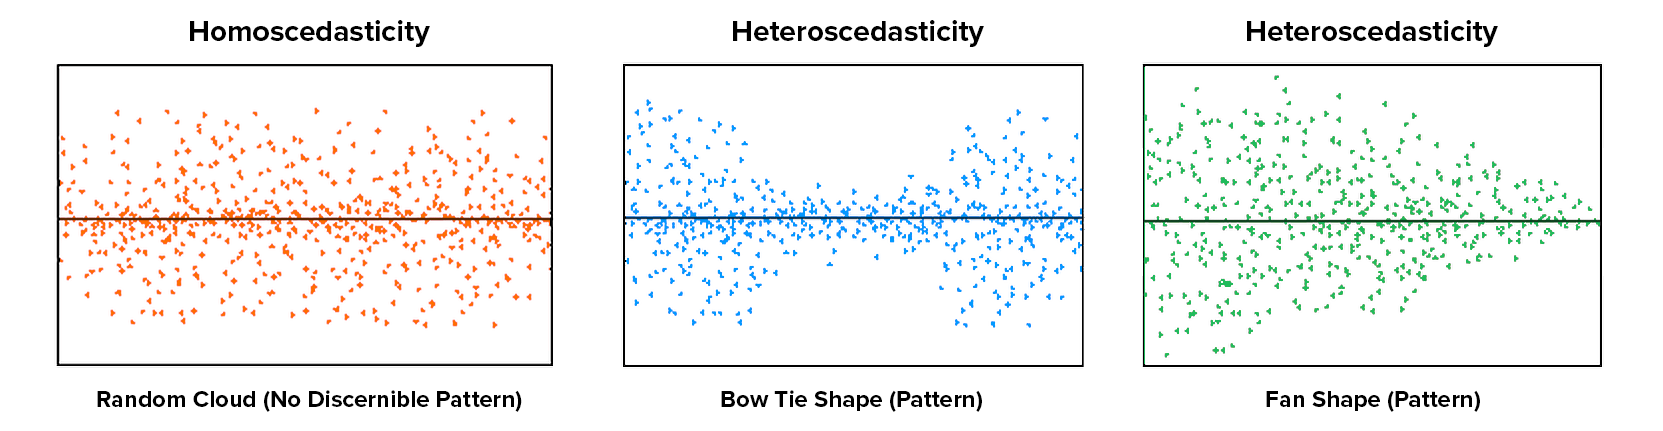

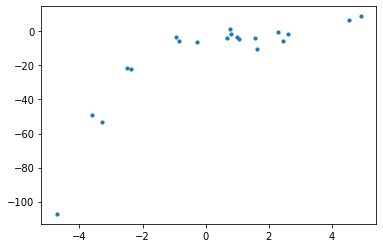

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

homoscedasticity:

15.908242501429998
0.6386750054827146


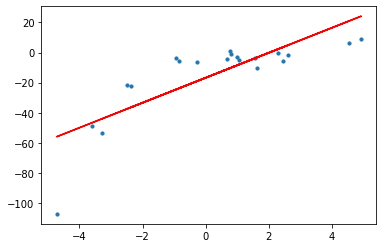

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

Dealing with Heteroscedasticity:
1. Log-transformation or Box-cox transformation of features- 
2. Outlier treatment
3. Try polynomial fit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


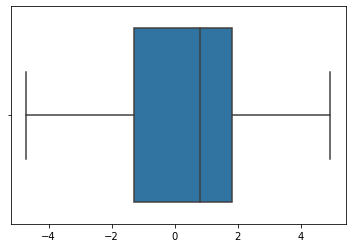

In [ ]:
#checking outliers
sns.boxplot(x)

**Degree of polynomial features**-

We can choose the degree of polynomial based on the relationship between target and predictor. The 1-degree polynomial is a simple linear regression; therefore, the value of degree must be greater than 1. With the increasing degree of the polynomial, the complexity of the model also increases.

After applying polynomial:

3.449895507408725
0.9830071790386679


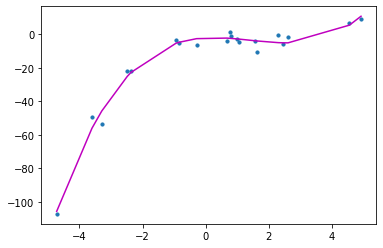

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

scatter plot for degree increment-

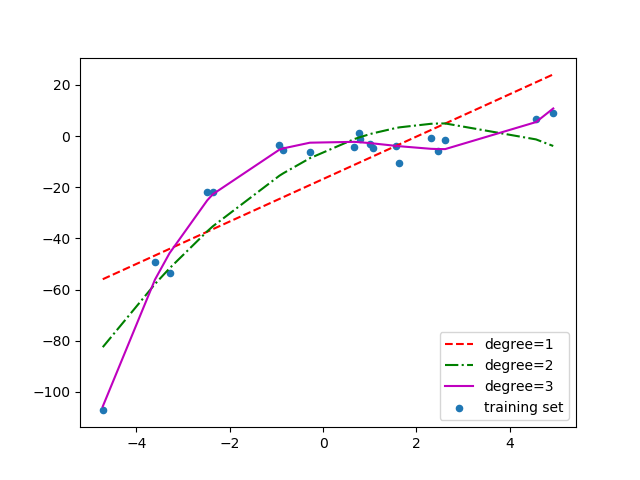

#Multicollinearity

**Multicollinearity-**
									Multicollinearity occurs when independent variables in a regression
									model are highly correlated.
									This correlation is a problem because independent variables should be
									independent. If the degree of correlation between variables is high
									enough, it can cause problems when you fit the model and interpret the
									results.

**Detection:**
Variance inflation factor(VIF) detects multicollinearity.

**VIF-** Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.

Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

A rule of thumb for interpreting the variance inflation factor:
1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.
																
                                VIF= 1/1-Ri**2
Where Ri**2 represents the unadjusted coefficient of determination for regressing the ith independent variable on the remaining ones



**Weight of Evidence**: The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.

**Information Value**: Information value tells us which columns in a data set have predictive power or influence on the value of a specified dependent variable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

	# Calculating VIF
	vif = pd.DataFrame()
	vif["variables"] = X.columns
	vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

	return(vif)
 
# applying on df-
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','price']]])

**What if Multicollinearity?**

Multicollinearity happens when independent variables in the regression model are highly correlated to each other. It makes it hard to interpret of model and also creates an overfitting problem. It is a common assumption that people test before selecting the variables into the regression model.

**how to remove multicollinearity:-**

1. Remove some of the highly correlated independent variables.
2. Linearly combine the independent variables, such as adding them together.
3. Perform an analysis designed for highly correlated variables, such as principal components analysis

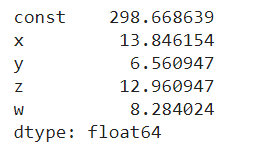

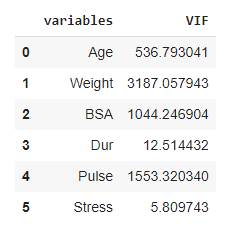

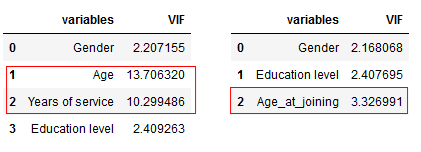